# Probability

In [1]:
from fractions import Fraction

## Die Rolls

### Sum 8

In [2]:
sum_8 = [(x, y) for x in range(1, 7) for y in range(1, 7) if x + y == 8]
sum_8

[(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)]

In [3]:
with_6 = [(x, y) for (x, y) in sum_8 if x == 6 or y == 6]
with_6

[(2, 6), (6, 2)]

In [4]:
Fraction(len(with_6), len(sum_8))

Fraction(2, 5)

### 100 Dice

All Sixes

In [5]:
float(Fraction(1, 6) ** 100)

1.5306467074865063e-78

No Sixes

In [6]:
float(Fraction(5, 6) ** 100)

1.2074673472413666e-08

### The Drunkard's Walk

In [7]:
def are_two_girls((a, b)):
    return a == "g" and b == "g"

In [8]:
two_children = [(a, b) for a in ("b", "g") for b in ("b", "g")]
two_children

[('b', 'b'), ('b', 'g'), ('g', 'b'), ('g', 'g')]

2 girls

In [9]:
Fraction(len([p for p in two_children if are_two_girls(p)]),
         len(two_children))

Fraction(1, 4)

given 1 girl

In [10]:
given_1_girl = [(a, b) for (a, b) in two_children if a == "g" or b == "g"]
given_1_girl

[('b', 'g'), ('g', 'b'), ('g', 'g')]

In [11]:
Fraction(len([p for p in given_1_girl if are_two_girls(p)]),
         len(given_1_girl))

Fraction(1, 3)

given older girl

In [12]:
given_older_girl = [(a, b) for (a, b) in two_children if b == "g"]
given_older_girl

[('b', 'g'), ('g', 'g')]

In [13]:
Fraction(len([p for p in given_older_girl if are_two_girls(p)]),
         len(given_older_girl))

Fraction(1, 2)

given 1 girl named "Florida"

In [14]:
Fraction(len([p for p in given_1_girl if are_two_girls(p)]),
         len(given_1_girl))

Fraction(1, 3)

## Monty Hall

In [15]:
import random

In [16]:
games = 1000

In [17]:
winner = [random.randint(1, 3) for x in xrange(games)]
winner[:3]

[1, 3, 1]

In [18]:
stay = [random.randint(1, 3) for x in xrange(games)]
stay[:3]

[2, 1, 3]

In [19]:
switch = []

for (w, s) in zip(winner, stay):
    if w != s:
        switch.append(w)
    else:
        choices = [1, 2, 3]
        choices.remove(w)
        switch.append(random.choice(choices))
        
switch[:3]

[1, 3, 1]

Stay

In [20]:
Fraction(len([(w, s) for (w, s) in zip(winner, stay) if w == s]), games)

Fraction(69, 200)

Switch

In [21]:
Fraction(len([(w, s) for (w, s) in zip(winner, switch) if w == s]), games)

Fraction(131, 200)

The simulation makes it clear that switching always wins if you pick a loser door, prob 2/3, but will always lose if you pick the winner, prob 1/3

## Poincare

In [22]:
import thinkstats

In [23]:
N = 4
num_loaves = 10000

loaves = []
for loaf in xrange(num_loaves):
    loaves.append(max([random.normalvariate(950, 50) for x in xrange(N)]))

(mu, v) = thinkstats.MeanVar(loaves)
sigma = v ** 0.5
(mu, sigma)

(1001.8807485557475, 35.60560593074925)

4 loaves are enough to shift the mean

In [24]:
import Cdf
import myplot
%matplotlib inline

/opt/blue-python/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [25]:
normal_cdf = Cdf.MakeCdfFromList([random.normalvariate(mu, sigma) for x in xrange(num_loaves)])
loaf_cdf = Cdf.MakeCdfFromList(loaves)

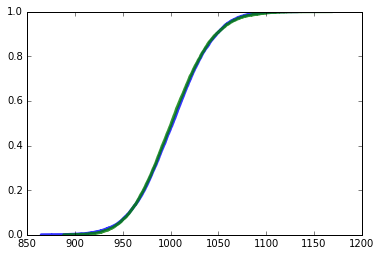

In [26]:
myplot.cdfs([normal_cdf, loaf_cdf])

There's a slight difference between the 2 distributions, not sure if its enough to bring in the bread police

## Dance Hall

In [27]:
num_couples = 1000

men = [random.normalvariate(178, 59.4**0.5) for _ in xrange(num_couples)]    
women = [random.normalvariate(163, 52.8**0.5) for _ in xrange(num_couples)]

Taller Women

In [28]:
Fraction(len([(m, w) for (m, w) in zip(men, women) if w > m]), num_couples)

Fraction(21, 250)

## More Dice

In [29]:
two_dice = [(x, y) for x in xrange(1, 7) for y in xrange(1, 7)]
two_dice[:3]

[(1, 1), (1, 2), (1, 3)]

at least 1 six

In [30]:
Fraction(len([(x, y) for (x, y) in two_dice if x == 6 or y == 6]),
         len(two_dice))

Fraction(11, 36)

$P(A) + P(B) - 2 \times P(A \& B)$

## Binomial Distribution

In [31]:
def p_binom(x, n, p=0.5):
    return thinkstats.Binom(n, x) * p**x * (1-p)**(n-x)

In [32]:
p_binom(50, 100)

0.07958923738717877

## Basketball

In [33]:
streak_games = 0
for game in xrange(82):
    streak_game = False
    for player in xrange(10):
        hit_streak = 0
        miss_streak = 0
        for shot in xrange(15):
            hit = random.randint(0, 1)
            if hit == 0:
                hit_streak = 0
                miss_streak += 1
            else:
                hit_streak += 1
                miss_streak = 0
            
            if (hit_streak == 10) or (miss_streak == 10):
                streak_game = True
    if streak_game:
        streak_games += 1

Prob of streak game

In [34]:
Fraction(streak_games, games)

Fraction(3, 500)

## Disease Control

In [35]:
size_cohort = 100
num_years = 10
num_cohorts = 10000

cases_per_cohort = [sum([max([1 if random.random() < 0.001 else 0 for year in xrange(num_years)])
                         for person in xrange(size_cohort)])
                    for cohort in xrange(num_cohorts)]
cases_per_cohort[:3]

[0, 0, 2]

In [36]:
import Pmf

Total Cases per Cohort

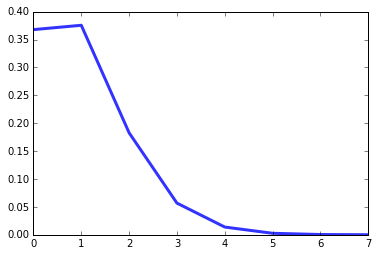

In [37]:
cases_pmf = Pmf.MakePmfFromList(cases_per_cohort)
myplot.Pmf(cases_pmf)

3 cases per cohort is statistically likely to happen at around 6% by chance alone

In [38]:
cases_pmf.Prob(3)

0.0568

Probability of at least one of the cohorts having a statistically significant cluster

In [39]:
1 - (0.95)**100

0.994079470779666

Making a grid and extending the number of years increases the probability of this happening dramatically

## Bayes Rule

### Cookies

In [40]:
bowls = {1: {"plain": 10, "chocolate": 30},
         2: {"plain": 20, "chocolate": 20}}

P(plain | bowl 1)

In [41]:
p_plain_1 = Fraction(bowls[1]["plain"], bowls[1]["plain"] + bowls[1]["chocolate"])
p_plain_1

Fraction(1, 4)

P(plain | bowl 2)

In [42]:
p_plain_2 = Fraction(bowls[2]["plain"], bowls[2]["plain"] + bowls[2]["chocolate"])
p_plain_2

Fraction(1, 2)

P(bowl 1) = P(bowl 2) = 1/2

In [43]:
p_bowl = Fraction(1, 2)
p_bowl

Fraction(1, 2)

P(plain) = P(bowl 1) x P(plain | bowl 1) + p(bowl 2) x P(plain | bowl 2)

In [44]:
p_plain = p_bowl * p_plain_1 + p_bowl * p_plain_2
p_plain

Fraction(3, 8)

P(bowl 1 | plain) = P(plain | bowl 1) x P(bowl 1) / P(plain)

In [45]:
p_plain_1 * p_bowl / p_plain

Fraction(1, 3)

### M & Ms

In [46]:
m_1994 = {"brown": Fraction(3, 10), "yellow": Fraction(2, 10), "red": Fraction(2, 10),
          "green": Fraction(1, 10), "orange": Fraction(1, 10), "tan": Fraction(1, 10)}
m_1996 = {"blue": Fraction(24, 100), "green": Fraction(2, 10), "orange": Fraction(16, 100),
          "yellow": Fraction(14, 100), "red": Fraction(13, 100), "brown": Fraction(13, 100)}

p(yellow_94 & green_96)

In [47]:
p_y4g6 = m_1994["yellow"] * m_1996["green"]
p_y4g6

Fraction(1, 25)

P(yellow_96 & green_94)

In [48]:
p_g4y6 = m_1994["green"] * m_1996["yellow"]
p_g4y6

Fraction(7, 500)

P(yellow & green)

In [49]:
p_yg = (m_1994["yellow"] * m_1996["green"]) + (m_1994["green"] * m_1996["yellow"])
p_yg

Fraction(27, 500)

p(yellow_94 | yellow & green) = p(yellow_94 & green_96) / p(yellow green)

In [50]:
p_y4g6/p_yg

Fraction(20, 27)